<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Hierarchical_Clustering_(Universities).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files=files.upload()

Saving Universities.csv to Universities.csv


In [5]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [6]:
Univ = pd.read_csv("Universities.csv")

In [8]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [11]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


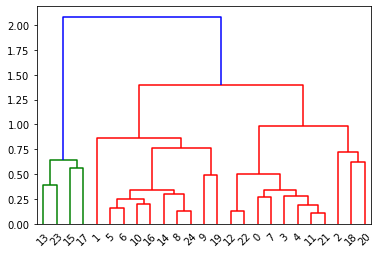

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [18]:
df_norm['h_clusterid'] = pd.DataFrame(y_hc)

In [19]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,2
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,2
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,0
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,2
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,2


In [20]:
Univ['h_clusterid'] = pd.DataFrame(y_hc)

In [21]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [22]:
#Grouping Data for predictions further 

result=Univ.iloc[:,1:].groupby(Univ.h_clusterid).mean()

In [23]:
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364,0
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000,1
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000,2
